# Leb9-1

## XOR 만들기
+layer 추가, deep Mnist

### float 선언하기 힘드니까 dtype=np.float32

## Neural Net 한 단만 사용

## Accuracy = 0.5


In [16]:
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.sigmoid(tf.matmul(x, w) + b)
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1-y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
#         cost_val, w_val, _ = sess.run([cost, w, train],
#                                      feed_dict={x: x_data,
#                                                y: y_data})
#         if step%1000 == 0:
#             print("Cost: ", cost_val,
#                  "w_val", w_val)

        sess.run(train,
                 feed_dict={x: x_data, y: y_data})
    
        if step%1000 == 0:
            print(sess.run(cost,
                           feed_dict={x: x_data, y: y_data}))

            
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict = {x: x_data, y: y_data})
    print('\nHypothesis: \n', h, '\nCorrect: \n', c, '\nAccuracy: \n', a)
             

0.8698098
0.6931577
0.6931471
0.6931472
0.6931472
0.6931472
0.6931472
0.6931472
0.6931472
0.6931472
0.6931472

Hypothesis: 
 [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct: 
 [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy: 
 0.5


## Neural Net 여러 단 사용
은닉층, layer

## Accuracy = 1.0


In [29]:
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

###
w1 = tf.Variable(tf.random_normal([2, 2]))
b1 = tf.Variable(tf.random_normal([2]))
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([2, 1]))
b2 = tf.Variable(tf.random_normal([1]))

hypothesis = tf.sigmoid(tf.matmul(layer1, w2) + b2)
###

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1-y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
#         cost_val, w_val, _ = sess.run([cost, w, train],
#                                      feed_dict={x: x_data,
#                                                y: y_data})
#         if step%1000 == 0:
#             print("Cost: ", cost_val,
#                  "w_val", w_val)

        sess.run(train,
                 feed_dict={x: x_data, y: y_data})
    
        if step%1000 == 0:
            print('cost: ',
                  sess.run(cost, feed_dict={x: x_data, y: y_data}),
                  '\nweight: \n', sess.run(w), '\n')

            
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict = {x: x_data, y: y_data})
    print('\nHypothesis: \n', h, '\nCorrect: \n', c, '\nAccuracy: \n', a)
##             

cost:  0.6992402 
weight: 
 [[0.66343457]
 [1.1730652 ]] 

cost:  0.6388945 
weight: 
 [[0.66343457]
 [1.1730652 ]] 

cost:  0.56157905 
weight: 
 [[0.66343457]
 [1.1730652 ]] 

cost:  0.5223352 
weight: 
 [[0.66343457]
 [1.1730652 ]] 

cost:  0.5024475 
weight: 
 [[0.66343457]
 [1.1730652 ]] 

cost:  0.46589395 
weight: 
 [[0.66343457]
 [1.1730652 ]] 

cost:  0.14694032 
weight: 
 [[0.66343457]
 [1.1730652 ]] 

cost:  0.06306999 
weight: 
 [[0.66343457]
 [1.1730652 ]] 

cost:  0.03905259 
weight: 
 [[0.66343457]
 [1.1730652 ]] 

cost:  0.028099028 
weight: 
 [[0.66343457]
 [1.1730652 ]] 

cost:  0.021878116 
weight: 
 [[0.66343457]
 [1.1730652 ]] 


Hypothesis: 
 [[0.02088399]
 [0.968922  ]
 [0.98311883]
 [0.01765321]] 
Correct: 
 [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy: 
 1.0


## 출력을 wide한 값 줌

In [30]:
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

###
w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([10, 1]))
b2 = tf.Variable(tf.random_normal([1]))

hypothesis = tf.sigmoid(tf.matmul(layer1, w2) + b2)
###

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1-y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
#         cost_val, w_val, _ = sess.run([cost, w, train],
#                                      feed_dict={x: x_data,
#                                                y: y_data})
#         if step%1000 == 0:
#             print("Cost: ", cost_val,
#                  "w_val", w_val)

        sess.run(train,
                 feed_dict={x: x_data, y: y_data})
    
        if step%1000 == 0:
            print('cost: ',
                  sess.run(cost, feed_dict={x: x_data, y: y_data}),
                  '\nweight: \n', sess.run(w), '\n')

            
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict = {x: x_data, y: y_data})
    print('\nHypothesis: \n', h, '\nCorrect: \n', c, '\nAccuracy: \n', a)
##             

cost:  0.73982763 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 

cost:  0.3917949 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 

cost:  0.09005224 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 

cost:  0.03951261 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 

cost:  0.023791483 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 

cost:  0.016611941 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 

cost:  0.012606002 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 

cost:  0.010084601 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 

cost:  0.008365398 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 

cost:  0.0071246373 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 

cost:  0.0061903764 
weight: 
 [[-0.02301527]
 [ 0.23683679]] 


Hypothesis: 
 [[0.00375383]
 [0.99281025]
 [0.99441344]
 [0.00814928]] 
Correct: 
 [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy: 
 1.0


## layer 하나 더 추가

In [31]:
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]], dtype=np.float)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

###
w1 = tf.Variable(tf.random_normal([2, 10]))
b1 = tf.Variable(tf.random_normal([10]))
layer1 = tf.sigmoid(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([10, 10]))
b2 = tf.Variable(tf.random_normal([10]))
layer2 = tf.sigmoid(tf.matmul(layer1, w2) + b2)

w3 = tf.Variable(tf.random_normal([10, 1]))
b3 = tf.Variable(tf.random_normal([1]))

hypothesis = tf.sigmoid(tf.matmul(layer2, w3) + b3)
###

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1-y) * tf.log(1-hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
#         cost_val, w_val, _ = sess.run([cost, w, train],
#                                      feed_dict={x: x_data,
#                                                y: y_data})
#         if step%1000 == 0:
#             print("Cost: ", cost_val,
#                  "w_val", w_val)

        sess.run(train,
                 feed_dict={x: x_data, y: y_data})
    
        if step%1000 == 0:
            print('cost: ',
                  sess.run(cost, feed_dict={x: x_data, y: y_data}),
                  '\nweight: \n', sess.run(w), '\n')

            
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict = {x: x_data, y: y_data})
    print('\nHypothesis: \n', h, '\nCorrect: \n', c, '\nAccuracy: \n', a)
##             

cost:  0.90303606 
weight: 
 [[-0.0037199]
 [-0.3439439]] 

cost:  0.5806645 
weight: 
 [[-0.0037199]
 [-0.3439439]] 

cost:  0.11699839 
weight: 
 [[-0.0037199]
 [-0.3439439]] 

cost:  0.027597554 
weight: 
 [[-0.0037199]
 [-0.3439439]] 

cost:  0.013719667 
weight: 
 [[-0.0037199]
 [-0.3439439]] 

cost:  0.008852005 
weight: 
 [[-0.0037199]
 [-0.3439439]] 

cost:  0.006454461 
weight: 
 [[-0.0037199]
 [-0.3439439]] 

cost:  0.0050478987 
weight: 
 [[-0.0037199]
 [-0.3439439]] 

cost:  0.0041301586 
weight: 
 [[-0.0037199]
 [-0.3439439]] 

cost:  0.0034871195 
weight: 
 [[-0.0037199]
 [-0.3439439]] 

cost:  0.003012929 
weight: 
 [[-0.0037199]
 [-0.3439439]] 


Hypothesis: 
 [[0.00274814]
 [0.9963331 ]
 [0.99726   ]
 [0.00287822]] 
Correct: 
 [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy: 
 1.0


# deep Mnist

Extracting MINIST_data/train-images-idx3-ubyte.gz
Extracting MINIST_data/train-labels-idx1-ubyte.gz
Extracting MINIST_data/t10k-images-idx3-ubyte.gz
Extracting MINIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Cost: 2.222164712
Epoch: 0002 Cost: 1.770673892
Epoch: 0003 Cost: 1.513761555
Epoch: 0004 Cost: 1.344854845
Epoch: 0005 Cost: 1.235321128
Epoch: 0006 Cost: 1.163990724
Epoch: 0007 Cost: 1.110714649
Epoch: 0008 Cost: 1.064821216
Epoch: 0009 Cost: 1.022337459
Epoch: 0010 Cost: 0.977555788
Epoch: 0011 Cost: 0.933802995
Epoch: 0012 Cost: 0.886971196
Epoch: 0013 Cost: 0.838205309
Epoch: 0014 Cost: 0.792932037
Epoch: 0015 Cost: 0.750496796
학습종료
Accuracy :  0.7802
Label:  [9]
Prediction:  [9]


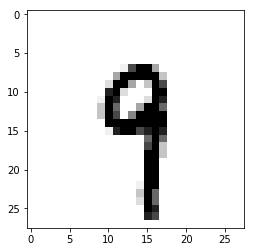

In [6]:
import tensorflow as tf
tf.reset_default_graph()

import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MINIST_data/", one_hot=True)

nb_classes = 10

#######
# 28*28
# x = tf.placeholder(tf.float32, [None, 784])
# y = tf.placeholder(tf.float32, [None, nb_classes])

imgSize = 28 * 28

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([imgSize, 256]))
b1 = tf.Variable(tf.random_normal([256]))
layer1 =  tf.nn.softmax(tf.matmul(x, w1) + b1)
# layer1 =  tf.matmul(x, w1) + b1 # (x)

w2 = tf.Variable(tf.random_normal([256, nb_classes]))
b2 = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(layer1, w2) + b2)
# hypothesis = tf.matmul(layer1, w2) + b2

#######

cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


#########epoch###########

training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer],
                            feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: %04d' % (epoch + 1),
             'Cost: {:.9f}'.format(avg_cost))
        
    print("학습종료")
    
    print("Accuracy : ", accuracy.eval(session=sess,
                                       feed_dict={x: mnist.test.images,
                                                 y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1),
                                   feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28),
              cmap='Greys',
              interpolation='nearest')
    plt.show()

## # deep Mnist2

Extracting MINIST_data/train-images-idx3-ubyte.gz
Extracting MINIST_data/train-labels-idx1-ubyte.gz
Extracting MINIST_data/t10k-images-idx3-ubyte.gz
Extracting MINIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Cost: 2.223275043
Epoch: 0002 Cost: 2.055656714
Epoch: 0003 Cost: 1.930164036
Epoch: 0004 Cost: 1.846887228
Epoch: 0005 Cost: 1.790044767
Epoch: 0006 Cost: 1.751315812
Epoch: 0007 Cost: 1.722770455
Epoch: 0008 Cost: 1.704504687
Epoch: 0009 Cost: 1.690889249
Epoch: 0010 Cost: 1.679510234
Epoch: 0011 Cost: 1.669960831
Epoch: 0012 Cost: 1.662868251
Epoch: 0013 Cost: 1.656046541
Epoch: 0014 Cost: 1.651126476
Epoch: 0015 Cost: 1.646495788
학습종료
Accuracy :  0.743
Label:  [1]
Prediction:  [1]


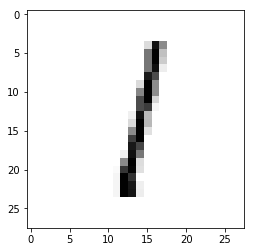

In [59]:
tf.reset_default_graph()

import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MINIST_data/", one_hot=True)

nb_classes = 10

#######

imgSize = 28 * 28


x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([imgSize, int(imgSize/2)]))
b1 = tf.Variable(tf.random_normal([int(imgSize/2)]))
layer1 = tf.matmul(x, w1) + b1

w2 = tf.Variable(tf.random_normal([int(imgSize/2), nb_classes]))
b2 = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.sigmoid(tf.matmul(layer1, w2) + b2))

#######

cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))


#########epoch###########

training_epochs = 15
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer],
                            feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch: %04d' % (epoch + 1),
             'Cost: {:.9f}'.format(avg_cost))
        
    print("학습종료")
    
    print("Accuracy : ", accuracy.eval(session=sess,
                                       feed_dict={x: mnist.test.images,
                                                 y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1),
                                   feed_dict={x:mnist.test.images[r:r+1]}))
    
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28),
              cmap='Greys',
              interpolation='nearest')
    plt.show()